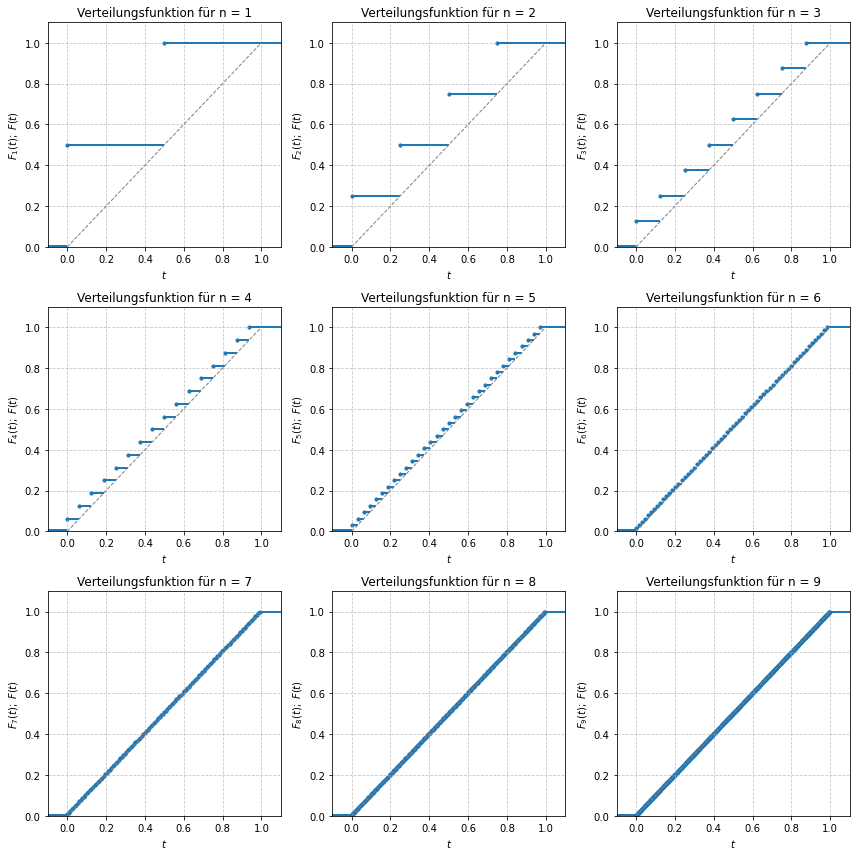

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def calculate_probabilities(n):
    # Alle möglichen Outcomes für n Münzwürfe (Binärzahlen von 0 bis 2^n-1)
    outcomes = np.arange(2**n)
    
    # Bitweise Extraktion und Berechnung von X_n
    Xn_values = outcomes[:, None] >> np.arange(n) & 1   # Binärstellen extrahieren
    Xn_values = Xn_values / 2**(np.arange(1, n+1))      # Werte entsprechend gewichten
    Xn_values = Xn_values.sum(axis=1)                   # Summe für jedes Ergebnis
    
    # Wahrscheinlichkeiten berechnen
    unique, counts = np.unique(Xn_values, return_counts=True)
    probabilities = counts / 2**n
    return unique, probabilities

# Setze das Layout der Subplots (3 Spalten, 3 Zeilen)
fig, axes = plt.subplots(3, 3, figsize=(12, 12))  # 3x3 Layout für die 9 Graphen
fig.tight_layout(pad=4.0)  # Abstände zwischen den Subplots

# Berechne und zeichne die Graphen für n=1 bis n=9
for n in range(1, 10):
    # Bestimme die Position des Subplots (Reihen und Spalten)
    row = (n-1) // 3  # Berechnung der Zeile
    col = (n-1) % 3   # Berechnung der Spalte
    ax = axes[row, col]  # Zugriff auf den entsprechenden Subplot
    
    # Berechne die Verteilungsfunktion für n
    x_values, probabilities = calculate_probabilities(n)
    Fn = np.cumsum(probabilities)  # Berechne F_n als kumulierte Summe
    
    # Zeichne den Graphen (Treppenfunktion)
    ax.scatter(x_values, Fn, s=10)  # Punkte für F_n(t)
    for i in range(len(Fn) - 1):
        ax.hlines(Fn[i], x_values[i], x_values[i+1], lw=2)  # Horizontale Linien für Treppenfunktion
    ax.hlines(Fn[-1], x_values[-1], 1.1, lw=2)  # Letzte horizontale Linie bis 1.1
    ax.hlines(0, -0.1, 0, lw=4)  # Horizontale Linie bei 0
    
    # Grid und F(t) (diagonale Linie) hinzufügen
    ax.grid(linestyle='--', alpha=0.7)
    x = np.linspace(0, 1, 100)
    ax.plot(x, x, ls="--", c="gray", lw=1)  # F(t) als diagonale Linie

    # Beschriftungen und Titel
    ax.set_xlabel('$t$')
    ax.set_ylabel(f'$F_{n}(t); \; F(t)$')
    ax.set_title(f'Verteilungsfunktion für n = {n}')
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(0, 1.1)
    plt.tight_layout()
    plt.savefig('Verteilungsfunktionen-3x3.png')  # speichern der Grafik als Verteilungsfunktionen-3x3.png

# Anzeige der 9 Subplots
plt.show()